<a href="https://colab.research.google.com/github/xiaoxuan716/Python_review/blob/main/Pandas_francis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.  **PrettyTable**
   : from prettytable import PrettyTable

    **Seaborn 2**


1.   import pandas

df_purchases = pandas.**read_csv**("AW_PurchasingData.csv", sep=";")

(head=None) 代表没有表头

cata = pd.read_csv("catalogue.tsv",sep='\t')


2.  pandas.options.display.float_format = '{:.2f}'.format 

让所有数据都以**2位数展示**


3.  vérifions le type de données des colonnes importées
print(df_purchases.dtypes)

4.  **数据转换**

df_purchases["ShipDate"] = pandas.to_datetime(df_purchases["ShipDate"])

to_numerical

df1["product_id"]=df1["product_id"].apply(str)

5.   **时间数据**： 

df_purchases['Quarter'] = df_purchases['OrderDate'].dt.quarter

6.  ** Def & apply **根据数据==多少 来重新命名数据名称 ex. 1 ==> janvier


Le __profilage des données__ est toujours crucial en intelligence d'affaires, donc ces méthodes nous aident à mieux comprendre nos données.
- `dtypes` retourne le type de chaque colonne (série) du DataFrame.
- `index` permet de voir la structure de l'index du DataFrame.
- `size` vous donne le nombre d'observations.
- `columns` vour permet de voir les colonnes de votre DataFrame.
- `head` et `tail` permettent de voir les premières ou les dernières observations du DataFrame.

### Filtrage des données lors de la sélection

==========================

**cond**=df_product["product_name"] == "Twix"

返回 True  False


df[cond] ===> **返回所有符合filter的值**

### Joindre les tables

full = df1.join(df2.set_index("product_id"), on="product_id")


### Fill NA
df_product["category"] = df_product["category"].fillna("N.D.")



### Meilleures ventes
- Afficher les Premiers & les derniers
 
df_sales_by_product.nlargest(10, columns=["line_total"])


df_sales_by_product.nsmallest(5, columns=["line_total"])


In [ ]:
# print("\nNombre d'observations: {0}\n".format(df_sales.size))
# Nombre d'observations: 110
print("df_product: {0}".format(df_product.size))


# voir la liste des colonnes... approche fancy
for column in df_sales.columns:
    print("Colonne du DataFrame: {0}".format(column))

#Colonne du DataFrame: salesorderdetail_id
#Colonne du DataFrame: product_id


### sélection d'une colonne (ou une serie)
df_product["product_name"]

### Selection d'un DataFrame
df_product[["product_name"]]


- La méthode `iloc` permet de demander de sélectionner des données __basées sur l'index__. Par défaut, pandas nous a créé un index qui correspond à chacune des observations (lignes) du DataFrame, exactement comme un index de liste.
- Encore une fois, si ici **on voulait avoir un DataFrame plutôt qu'une `Series` **retournée, **on mettrait deux crochets** comme dans l'exemple ci-dessus (`df_product.iloc[[2]]`).

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io 
uploaded = files.upload()
df = pd.read_csv('AW_PurchasingData.csv', sep=";",header=[0])
df.head()

Saving AW_PurchasingData.csv to AW_PurchasingData (3).csv


,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue
0,1,1580,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,201.04,16.08,5.03,222.15
1,2,1496,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,272.10,21.77,6.80,300.67
2,3,1494,2,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,8847.30,707.78,221.18,9776.27
3,4,1650,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,171.08,13.69,4.28,189.04
4,5,1654,1,1,2011-04-30 00:00:00.000,2011-05-09 00:00:00.000,20397.30,1631.78,509.93,22539.02


**调整 format 只输出两位数**

In [12]:
pd.options.display.float_format = '{:.2f}'.format
# imprimez le contenu DataFrame pour vérifier que le fichier a été lu correctement.
df

,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue
0,1,1580,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,201.04,16.08,5.03,222.15
1,2,1496,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,272.10,21.77,6.80,300.67
2,3,1494,2,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,8847.30,707.78,221.18,9776.27
3,4,1650,1,1,2011-04-16 00:00:00.000,2011-04-25 00:00:00.000,171.08,13.69,4.28,189.04
4,5,1654,1,1,2011-04-30 00:00:00.000,2011-05-09 00:00:00.000,20397.30,1631.78,509.93,22539.02
...,...,...,...,...,...,...,...,...,...,...
4007,4008,1676,1,1,2014-04-22 00:00:00.000,2014-05-17 00:00:00.000,396729.00,31738.32,7934.58,436401.90
4008,4009,1546,1,1,2013-11-09 00:00:00.000,2013-12-04 00:00:00.000,14915.00,1193.20,298.30,16406.50
4009,4010,1574,1,1,2013-11-09 00:00:00.000,2013-12-04 00:00:00.000,37760.00,3020.80,755.20,41536.00
4010,4011,1546,1,1,2014-06-24 00:00:00.000,2014-07-19 00:00:00.000,54492.50,4359.40,1089.85,59941.75


**数据筛选**

In [31]:
# sélectionner la troisième ligne... index [2] comme serie
df.iloc[2]

PurchaseOrderID                      3
VendorID                          1494
CreditRating                         2
ActiveFlag                           1
OrderDate          2011-04-16 00:00:00
ShipDate           2011-04-25 00:00:00
SubTotal                       8847.30
TaxAmt                          707.78
Freight                         221.18
TotalDue                       9776.27
VendorIDStr                       1494
Quarter                              2
QuarterName                   deuxième
Name: 2, dtype: object

In [34]:
# sélectionner la troisième ligne... index [2] comme DataFrame
df.iloc[[2]]

,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter,QuarterName
2,3,1494,2,1,2011-04-16,2011-04-25,8847.30,707.78,221.18,9776.27,1494,2,deuxième


In [33]:
# sélectionner de la deuxième jusqu'à la quatrième ligne  index =1 a index =3
df.iloc[1:4]

,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter,QuarterName
1,2,1496,1,1,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,1496,2,deuxième
2,3,1494,2,1,2011-04-16,2011-04-25,8847.30,707.78,221.18,9776.27,1494,2,deuxième
3,4,1650,1,1,2011-04-16,2011-04-25,171.08,13.69,4.28,189.04,1650,2,deuxième


In [35]:
# sélectionner le deuxième ET le cinquième enregistrement index1 et 4
df.iloc[[1,4]]

,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter,QuarterName
1,2,1496,1,1,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,1496,2,deuxième
4,5,1654,1,1,2011-04-30,2011-05-09,20397.30,1631.78,509.93,22539.02,1654,2,deuxième


**数据转换： to_datetime; to_numerical ; STR**

In [14]:
### assurez-vous que la date de la commande et la date d'expédition sont en format datetime.
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["ShipDate"] = pd.to_datetime(df["ShipDate"])
df['VendorIDStr'] = df['VendorID'].apply(str)

**Datetime 转化成 文本形式**




In [18]:
# créer une nouvelle série dans le dataframe existant contenant la valeur du trimestre extraite
# à partir du 'OrderDate'
df['Quarter'] = df['OrderDate'].dt.quarter

In [19]:
# définition d'une fonction pour transformer le numéro du trimestre dans son nom
def NomTrimestre(QVal):

    if QVal == 1:
        nom = 'premier'
    elif QVal == 2:
        nom = 'deuxième'
    elif QVal == 3:
        nom = 'troisième'
    else:
        nom = 'quatrième'
        
    return nom

In [22]:
# nous appelons la fonction nouvellement définie (en utilisant 'apply') pour créér une série et 
# la mettre à jour avec les noms des trimistres
df['QuarterName'] = df['Quarter'].apply(NomTrimestre)
df.head()

,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter,QuarterName
0,1,1580,1,1,2011-04-16,2011-04-25,201.04,16.08,5.03,222.15,1580,2,deuxième
1,2,1496,1,1,2011-04-16,2011-04-25,272.10,21.77,6.80,300.67,1496,2,deuxième
2,3,1494,2,1,2011-04-16,2011-04-25,8847.30,707.78,221.18,9776.27,1494,2,deuxième
3,4,1650,1,1,2011-04-16,2011-04-25,171.08,13.69,4.28,189.04,1650,2,deuxième
4,5,1654,1,1,2011-04-30,2011-05-09,20397.30,1631.78,509.93,22539.02,1654,2,deuxième


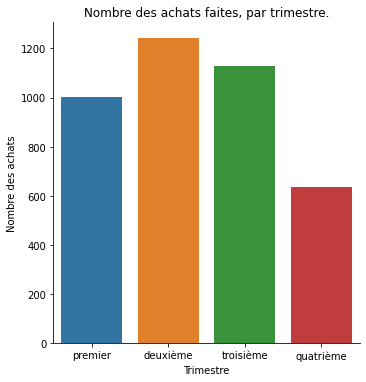

In [24]:
# production de la visualisation
sns.catplot(kind='count', x='QuarterName', data=df, order=['premier','deuxième','troisième','quatrième']). \
    set(xlabel='Trimestre', ylabel='Nombre des achats', title='Nombre des achats faites, par trimestre.')

**Et enfin, utilisez PrettyTable pour afficher en format tabulaire le nombre des achats par trimestre.**

In [28]:
# approche 1
df_purchases_count = df.groupby(['QuarterName']).count().reset_index()
# approche 1
df_purchases_count

,QuarterName,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter
0,deuxième,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244
1,premier,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
2,quatrième,635,635,635,635,635,635,635,635,635,635,635,635
3,troisième,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129


In [29]:
# approche 2
# reindex(["",""]) ==> 决定顺序
df_purchases_count = df.groupby(['QuarterName']).count().\
    reindex(['premier','deuxième','troisième','quatrième']).reset_index()
df_purchases_count

,QuarterName,PurchaseOrderID,VendorID,CreditRating,ActiveFlag,OrderDate,ShipDate,SubTotal,TaxAmt,Freight,TotalDue,VendorIDStr,Quarter
0,premier,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
1,deuxième,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244
2,troisième,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129
3,quatrième,635,635,635,635,635,635,635,635,635,635,635,635


In [30]:
# PrettyTable est une librairie Python conçue pour permettre de représenter rapidement et facilement
# des données tabulaires dans des tableaux ASCII visuellement attrayants.
from prettytable import PrettyTable

# on définit un format d'affichage (colonnes, cellules etc.)

# field_names = ['Trimestre', 'Count'] : nous stockons les titres des colonnes dans une variable de type liste
pt = PrettyTable(field_names = ['Trimestre', 'Count'])

# lire le contenu du dataframe 'df_purchases_count', un enregistrement à la fois, seulement les attributs
# 'QuarterName' et 'PurchaseOrderID' et stocker les valeurs dans un tableau "array"
[ pt.add_row([line['QuarterName'], line['PurchaseOrderID']]) for line in df_purchases_count.to_records(index = False) ]

# options de centrage pour l'affichage
pt.align['Trimestre'] = "r"  # right
pt.align['Count'] = "l" # autre option "c"  centre

# une fois le formatage finalisé, on affiche…
print(pt)

+-----------+-------+
| Trimestre | Count |
+-----------+-------+
|   premier | 1004  |
|  deuxième | 1244  |
| troisième | 1129  |
| quatrième | 635   |
+-----------+-------+


**prettyTable**

on définit un format d'affichage (colonnes, cellules etc.)

#### df_product.columns : renvoie les noms des colonnes

#### field_names = list(df_product.columns) : nous stockons les noms dans une variable de type liste
pt = PrettyTable(field_names = list(df_product.columns))


也可以自己任意命名

pt = PrettyTable(field_names = list(["1","2","3"]))


**Seaborn**

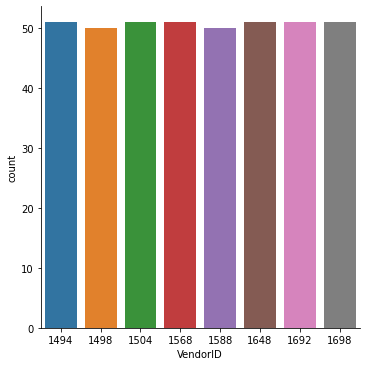

In [15]:
# sélectionner les lignes à partir de 'df_purchases' avec plusieurs conditions
df_vendor_sample = df[(df["ActiveFlag"] == 1) & (df["CreditRating"] == 2)]

# nombre d'achats effectués auprès de fournisseurs répondant aux critères de sélection
sns.catplot(kind='count', x='VendorID', data=df_vendor_sample)

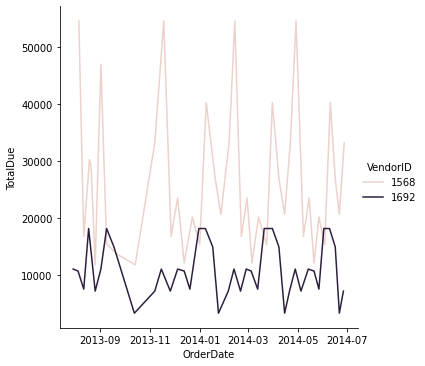

In [16]:
df_vendor_sample_1568_1692 = df_vendor_sample[((df_vendor_sample["VendorID"] == 1568) | \
                                                (df_vendor_sample["VendorID"] == 1692)) & \
                                                (df_vendor_sample["OrderDate"] > '2013-06-30') & \
                                                (df_vendor_sample["OrderDate"] < '2014-06-30')]
sns.relplot(kind='line', x='OrderDate', y='TotalDue', hue='VendorID', data=df_vendor_sample_1568_1692)